In [1]:
import pandas as pd # pandas for data analysing
train = pd.read_csv('train.csv') # imported the train file
test = pd.read_csv('test.csv') # imported the test file 

In [2]:
train.info() # to find missing values ( Age,Cabin,Embarked missing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
ship = train.append(test, ignore_index = True) # Appended both files so that we have data sets of files for use

In [6]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [7]:
ship.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [8]:
ship.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


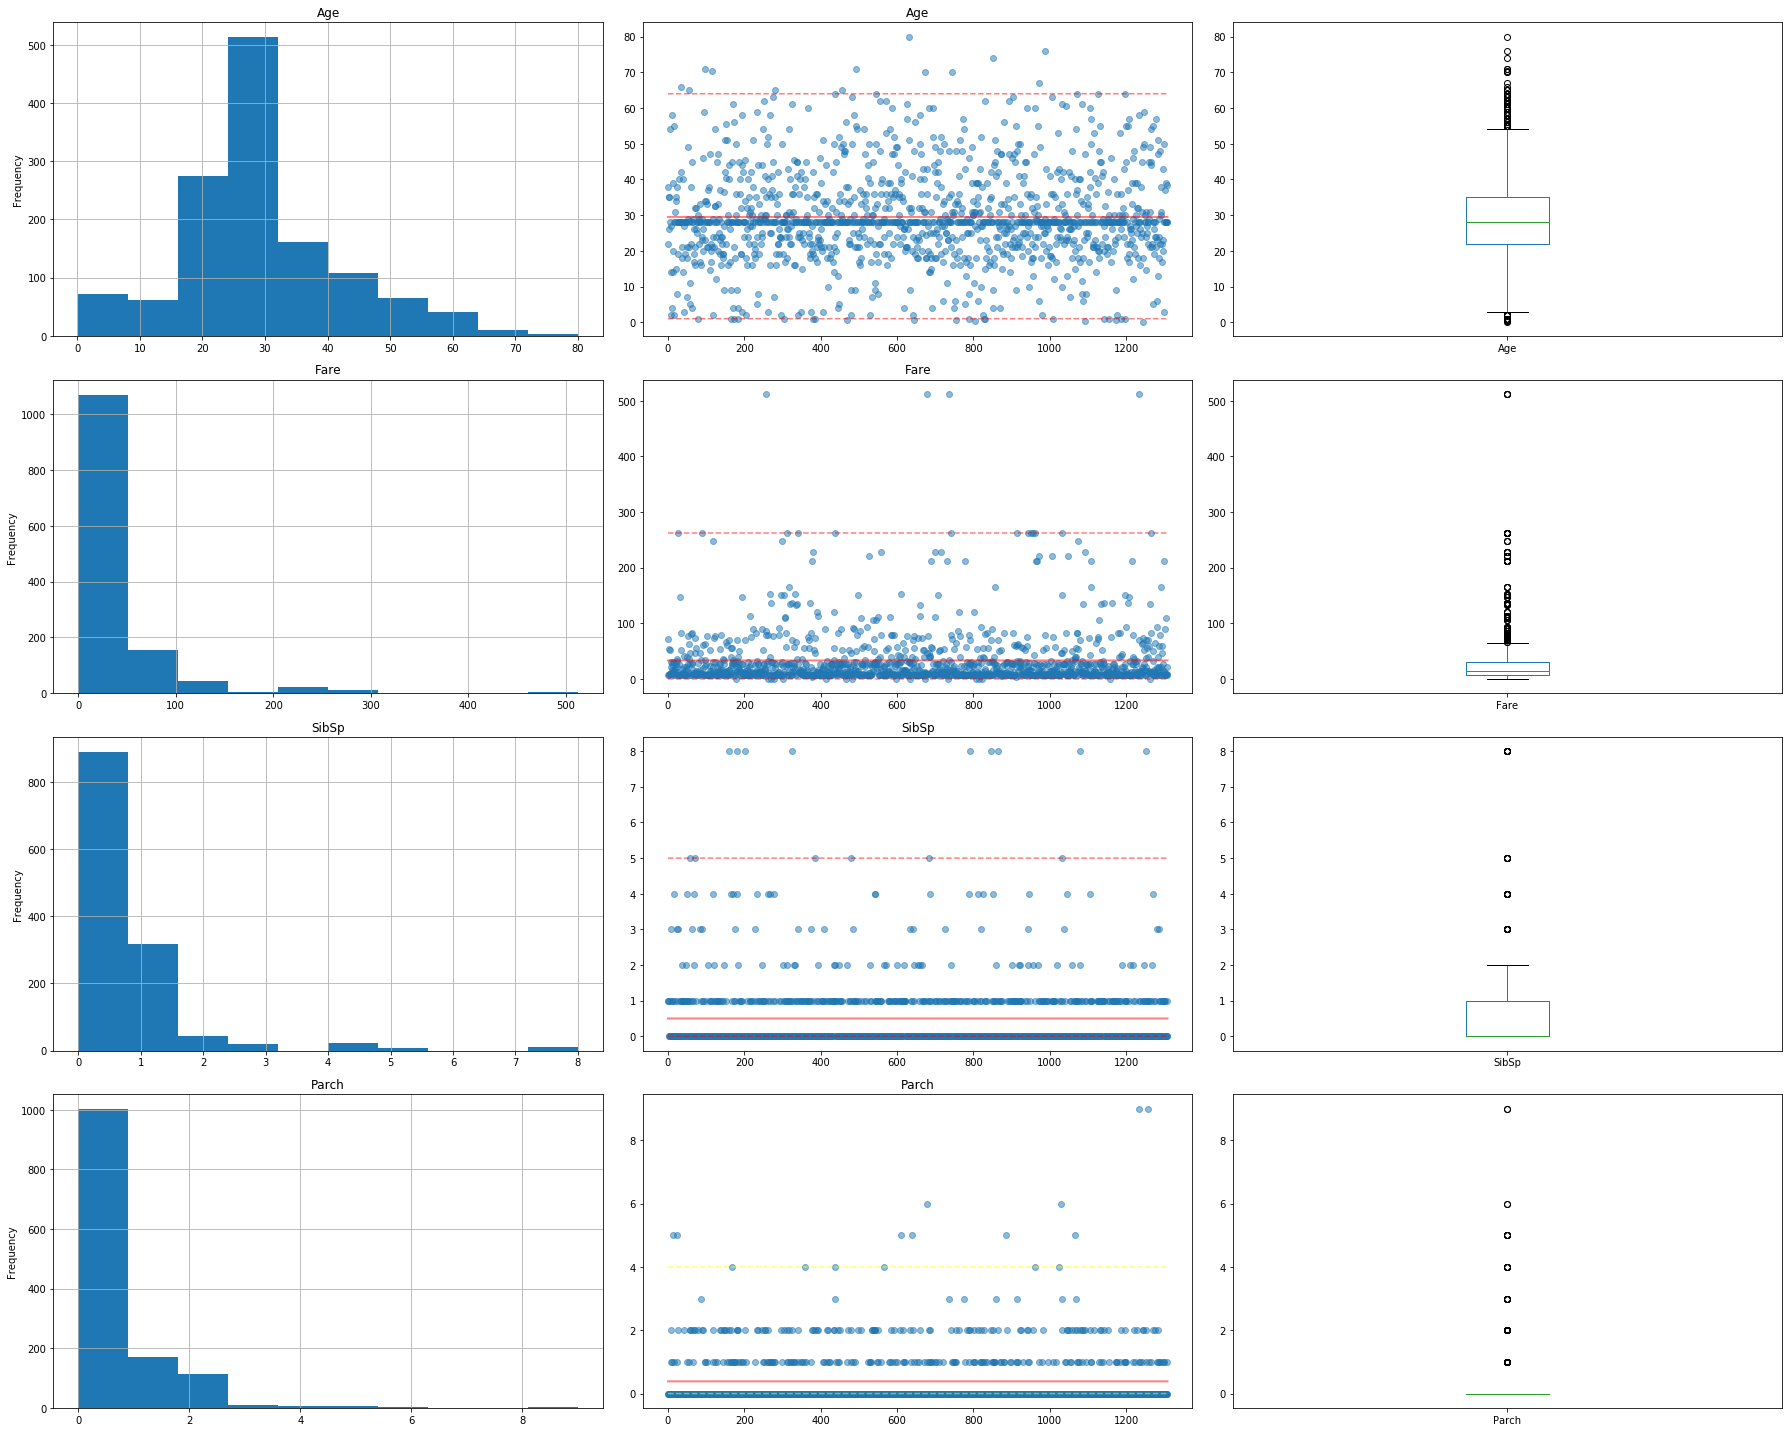

In [41]:
# Visualizing Numeric Values

import matplotlib.pyplot as plt

fig=plt.figure()

###
ax1=fig.add_subplot(4,3,1)
ax1=ship['Age'].plot(kind='hist',
         title='Age',
        
         grid=True,
        figsize=(25,20))

ax2=fig.add_subplot(4,3,2)
ax2=ship['Age'].plot(kind='line',
         title='Age',
         style='o',
         grid=False,
         alpha=0.5,figsize=(25,20)
         )
ax2=plt.plot([ship['Age'].mean()]*ship.shape[0],color='red',linewidth=2,alpha=0.5)
ax2=plt.plot([ship['Age'].quantile(q=0.01)]*ship.shape[0],
          linestyle='--',
          color='red',
          alpha=0.5)
ax2=plt.plot([ship['Age'].quantile(q=0.99)]*ship.shape[0],
          linestyle='--',
          color='red',
          alpha=0.5)

ax3=fig.add_subplot(4,3,3)
ax3=ship['Age'].plot(kind='box',figsize=(26,18))

##Fare
###
ax4=fig.add_subplot(4,3,4)
ax4=ship['Fare'].plot(kind='hist',
         title='Fare',
         grid=True,
        figsize=(25,20))
###
ax5=fig.add_subplot(4,3,5)
ax5=ship['Fare'].plot(kind='line',
         title='Fare',
         style='o',
         grid=False,
         alpha=0.5,figsize=(25,20)
         )
ax5=plt.plot([ship['Fare'].mean()]*ship.shape[0],color='red',linewidth=2,alpha=0.5)
ax5=plt.plot([ship['Fare'].quantile(q=0.01)]*ship.shape[0],
          linestyle='--',
          color='red',
          alpha=0.5)
ax5=plt.plot([ship['Fare'].quantile(q=0.99)]*ship.shape[0],
          linestyle='--',
          color='red',
          alpha=0.5)

###

###
ax6=fig.add_subplot(4,3,6)
ax6=ship['Fare'].plot(kind='box')

##Sibsp
###

ax7=fig.add_subplot(4,3,7)
ax7=ship['SibSp'].plot(kind='hist',
         title='SibSp',
         grid=True,
        figsize=(16,8))
###
ax8=fig.add_subplot(4,3,8)
ax8=ship['SibSp'].plot(kind='line',
         title='SibSp',
         style='o',
         grid=False,
         alpha=0.5,figsize=(25,20)
         )
ax8=plt.plot([ship['SibSp'].mean()]*ship.shape[0],color='red',linewidth=2,alpha=0.5)
ax8=plt.plot([ship['SibSp'].quantile(q=0.01)]*ship.shape[0],
          linestyle='--',
          color='red',
          alpha=0.5)


ax8=plt.plot([ship['SibSp'].quantile(q=0.99)]*ship.shape[0],
          linestyle='--',
          color='red',
          alpha=0.5)

###
ax9=fig.add_subplot(4,3,9)
ax9=ship['SibSp'].plot(kind='box')

##Parch
###

ax10=fig.add_subplot(4,3,10)
ax10=ship['Parch'].plot(kind='hist',
         title='Parch',
         grid=True,
        figsize=(25,20))
###
ax11=fig.add_subplot(4,3,11)
ax11=ship['Parch'].plot(kind='line',
         title='Parch',
         style='o',
         grid=False,
         alpha=0.5,figsize=(25,20)
         )
ax11=plt.plot([ship['Parch'].mean()]*ship.shape[0],color='red',linewidth=2,alpha=0.5)
ax11=plt.plot([ship['Parch'].quantile(q=0.01)]*ship.shape[0],
          linestyle='--',
          color='yellow',
          alpha=0.5)


ax11=plt.plot([ship['Parch'].quantile(q=0.99)]*ship.shape[0],
          linestyle='--',
          color='yellow',
          alpha=0.5)

###

###
ax12=fig.add_subplot(4,3,12)
ax12=ship['Parch'].plot(kind='box')

plt.tight_layout()

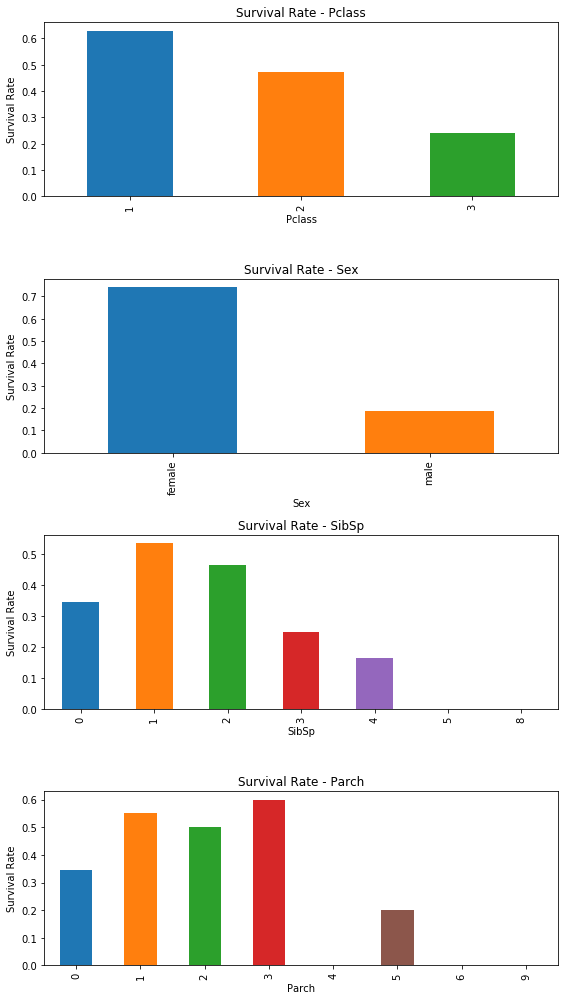

In [10]:

# We are trying to visualize the interaction between categoric and target variable. As we are trying to predict the target
# variable its important to visualize and analyse with other variables. In the following charts it seems that 
# higher the pclass the survival rate the higher the survival rate also , ladies had a better chance than men


feature_list=['Pclass','Sex','SibSp','Parch']
fig_row_size=len(feature_list)
fig_col_size=1
fig=plt.figure()
for i in range(len(feature_list)):
    feature=feature_list[i]
    fig_name=fig.add_subplot(fig_row_size,fig_col_size,int(i+1))
    df_for_plotting=ship.groupby(feature).agg(['sum','count'])['Survived']
    df_for_plotting['SurvivalRate']=df_for_plotting['sum']/df_for_plotting['count']
    plot_title=('Survival Rate - '+feature)
    df_for_plotting.SurvivalRate.plot(kind='bar',title=plot_title,ax=fig_name,figsize=(8,14))
    fig_name.set_ylabel('Survival Rate')

plt.tight_layout()

In [11]:
ship.isnull().sum() # to find the missing data points

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

(array([ 72.,  62., 274., 250., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

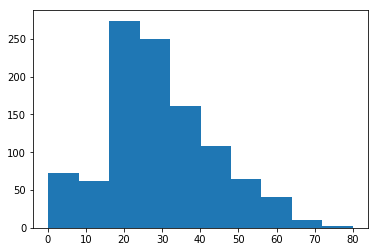

In [12]:
# Age, Cabin and Embarked needs to be filled. Decided to fill the Age column, have to decide wether to use mean or median
import matplotlib.pyplot as plt
%matplotlib inline

filledAge = ship[ship['Age'].notnull()]

plt.hist(filledAge['Age'])

In [13]:
# if we use mean we will be filling data which will be too low so we will use median.
ship['Age'].median()

28.0

In [14]:
ship['Age'] = ship['Age'].fillna(ship['Age'].median())

(array([ 72.,  62., 274., 513., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

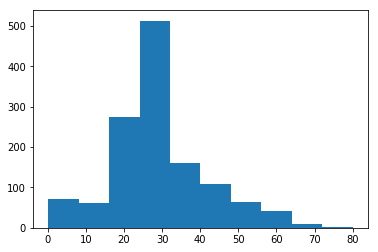

In [15]:
# We need to make sure Age was filled
plt.hist(ship['Age'])

In [16]:
ship.isnull().sum() # Age has been filled

Age               0
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [17]:
# Decided to drop the Cabin column since specific info could not be filled
del ship['Cabin'] 


In [18]:
ship.isnull().sum() # Cabin has been dropped

Age              0
Embarked         2
Fare             1
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

In [19]:
# Replacing missing values in Embarked

ship['Embarked']=ship['Embarked'].fillna(ship['Embarked'].value_counts().idxmax())


In [20]:
ship.isnull().sum()

Age              0
Embarked         0
Fare             1
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

In [21]:
# Replacing the missing values of Fare

ship['Fare']=ship.groupby(['Pclass','Sex'])['Fare'].transform(lambda x: x.fillna(x.median()))


In [22]:
ship.isnull().sum()

Age              0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

In [23]:
ship.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [24]:
#  Dropping the unneccessary features like Name, Passenger Id and Ticket.

del ship['Name']
del ship['PassengerId']
del ship['Ticket']



In [25]:
ship.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,0,3,male,1,0.0
1,38.0,C,71.2833,0,1,female,1,1.0
2,26.0,S,7.9250,0,3,female,0,1.0
3,35.0,S,53.1000,0,1,female,1,1.0
4,35.0,S,8.0500,0,3,male,0,0.0


In [26]:
# Now we will create dummy variables for categorical inputs.

ship=pd.get_dummies(ship, columns=['Pclass','Sex','Embarked'])

In [27]:
ship.head()

,Age,Fare,Parch,SibSp,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,1,0.0,0,0,1,0,1,0,0,1
1,38.0,71.2833,0,1,1.0,1,0,0,1,0,1,0,0
2,26.0,7.9250,0,0,1.0,0,0,1,1,0,0,0,1
3,35.0,53.1000,0,1,1.0,1,0,0,1,0,0,0,1
4,35.0,8.0500,0,0,0.0,0,0,1,0,1,0,0,1


In [28]:
# Split the data back to the original train test from Kaggle
print(len(train), len(test), len(ship))


891 418 1309


In [29]:
editTrain = ship[:891]
print(len(editTrain))
editTest = ship[891:]
print(len(editTest))

891
418


In [30]:
from sklearn.model_selection import train_test_split
survived = editTrain['Survived']
editTrain.drop('Survived', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(editTrain, survived, test_size=0.2, random_state=42)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
logicR = LogisticRegression().fit(X_train, y_train)
RandonF = RandomForestClassifier().fit(X_train, y_train)
GradB = GradientBoostingClassifier().fit(X_train, y_train)


In [33]:
print(logicR.score(X_test, y_test))
print(RandonF.score(X_test, y_test))
print(GradB.score(X_test, y_test))



0.7988826815642458
0.8100558659217877
0.8212290502793296


In [34]:
# Predicting on test
editTest.head()

,Age,Fare,Parch,SibSp,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
891,34.5,7.8292,0,0,NaN,0,0,1,0,1,0,1,0
892,47.0,7.0000,0,1,NaN,0,0,1,1,0,0,0,1
893,62.0,9.6875,0,0,NaN,0,1,0,0,1,0,1,0
894,27.0,8.6625,0,0,NaN,0,0,1,0,1,0,0,1
895,22.0,12.2875,1,1,NaN,0,0,1,1,0,0,0,1


In [35]:
del editTest['Survived']

In [36]:
editTest.head()

,Age,Fare,Parch,SibSp,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
891,34.5,7.8292,0,0,0,0,1,0,1,0,1,0
892,47.0,7.0000,0,1,0,0,1,1,0,0,0,1
893,62.0,9.6875,0,0,0,1,0,0,1,0,1,0
894,27.0,8.6625,0,0,0,0,1,0,1,0,0,1
895,22.0,12.2875,1,1,0,0,1,1,0,0,0,1


In [37]:
survived = GradB.predict(editTest)

In [38]:
results = pd.DataFrame(columns = ['PassengerId', 'Survived'])
results.head()

,PassengerId,Survived


In [39]:
results["PassengerId"] = test["PassengerId"]
results["Survived"] = survived.astype(int)
results

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [40]:
results.to_csv('results.csv', index=False)